<a href="https://colab.research.google.com/github/Antika20/Repo_Latihan_Machine_Learning/blob/main/Algoriitma_CNN_Rice_Disease_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://www.kaggle.com/datasets/vbookshelf/rice-leaf-diseases

In [ ]:
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
import zipfile,os,shutil

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from zipfile import ZipFile
file_name = "/content/drive/MyDrive/DATASET/Rice.zip"

with ZipFile(file_name,'r') as zip:
  zip.extractall()
  print("done")

done


In [ ]:
# Mendefinisikan direktori utama dataset
base_dir = '/content/rice_leaf_diseases'

In [ ]:
print(os.listdir(base_dir))

['Bacterial leaf blight', 'Brown spot', 'Leaf smut']


In [ ]:
# Menghitung jumlah gambar pada dataset
number_label = {}
total_files = 0
for i in os.listdir(base_dir):
    counting = len(os.listdir(os.path.join(base_dir, i)))
    number_label[i] = counting
    total_files += counting

    print("Total Files : " + str(total_files))

Total Files : 40
Total Files : 80
Total Files : 120


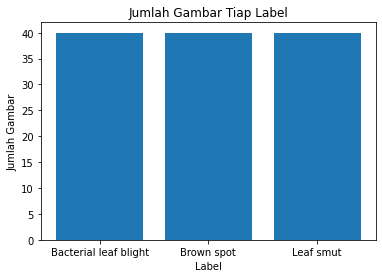

In [ ]:
# Visualisasi jumlah gambar tiap kelas
import matplotlib.pyplot as plt

plt.bar(number_label.keys(), number_label.values());
plt.title("Jumlah Gambar Tiap Label");
plt.xlabel('Label');
plt.ylabel('Jumlah Gambar');

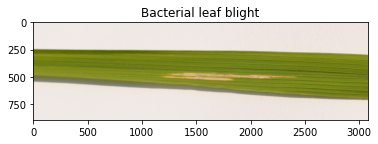

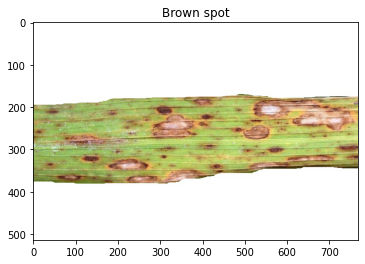

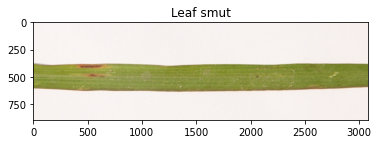

In [ ]:
# Menampilkan sampel gambar tiap kelas
import matplotlib.image as mpimg

img_each_class = 1
img_samples = {}
classes = list(number_label.keys())


for c in classes:
    temp = os.listdir(os.path.join(base_dir, c))[:img_each_class]
    for item in temp:
        img_path = os.path.join(base_dir, c, item)
        img_samples[c] = img_path

for i in img_samples:
    fig = plt.gcf()
    img = mpimg.imread(img_samples[i])
    plt.title(i)
    plt.imshow(img)
    plt.show()

In [ ]:
# Membuat Train dan Val 

# file direktori dengan gambar daisy untuk training
train_bacterial_dir = os.path.join('/content/rice_leaf_diseases/Bacterial leaf blight')

# file direktori dengan gambar dandelion untuk training
train_brown_dir = os.path.join('/content/rice_leaf_diseases/Brown spot')

# file direktori dengan gambar rose untuk training
train_leaf_dir = os.path.join('/content/rice_leaf_diseases/Leaf smut')

In [ ]:
# file direktori dengan gambar daisy untuk training
val_bacterial_dir = os.path.join('/content/rice_leaf_diseases/Bacterial leaf blight')

# file direktori dengan gambar dandelion untuk training
val_brown_dir = os.path.join('/content/rice_leaf_diseases/Brown spot')

# file direktori dengan gambar rose untuk training
val_leaf_dir = os.path.join('/content/rice_leaf_diseases/Leaf smut')

In [ ]:
print('total training daisy images ',len(os.listdir(train_bacterial_dir)))

print('total training dandelion images ',len(os.listdir(train_brown_dir)))

print('total training rose images ',len(os.listdir(train_leaf_dir)))

# Val
print('total validasi daisy images ',len(os.listdir(train_bacterial_dir)))

print('total validasi dandelion images ',len(os.listdir(train_brown_dir)))

print('total validasi rose images ',len(os.listdir(train_leaf_dir)))

total training daisy images  40
total training dandelion images  40
total training rose images  40
total validasi daisy images  40
total validasi dandelion images  40
total validasi rose images  40


In [ ]:
train_bacterial_names = os.listdir(train_bacterial_dir) # penyimpan ke  model 

train_brown_names = os.listdir(train_brown_dir)

train_leaf_names = os.listdir(train_leaf_dir)

# VAL

train_bacterial_names = os.listdir(train_bacterial_dir) # penyimpan ke  model 

train_brown_names = os.listdir(train_brown_dir)

train_leaf_names = os.listdir(train_leaf_dir)

In [ ]:
#untuk membuat Label -> Y
#ImageGenerator -> mudah mengklasifikasikan 2 gambar dalam 2  folder

from tensorflow.keras.preprocessing.image import ImageDataGenerator 

#resize nilai matriks pada gambar -> Mesinnya
train_datagen = ImageDataGenerator(rescale = 1/255, 
                                   rotation_range = 20,
                                   horizontal_flip= True, # bisa model ke kiri dan kanan  
                                   shear_range = 0.2,
                                   validation_split = 0.2)

train_generator = train_datagen.flow_from_directory(  # akan menampilkan dari directory 
    '/content/rice_leaf_diseases',  # sumber gambar 
    target_size =(300,300),  # resize gambar menjadi 300 x 300 pixel 
    batch_size = 128,  # setiap ngabil data akan mengambil 128 data 
    subset= 'training',
    class_mode = 'categorical')  # ini karena 2 class 

val_generator = train_datagen.flow_from_directory( # akan menampilkan dari directory 
    '/content/rice_leaf_diseases', # sumber gambar 
    target_size =(300,300), # resize gambar menjadi 300 x 300 pixel 
    batch_size = 128, # setiap ngabil data akan mengambil 128 data 
    subset= 'validation',
    class_mode = 'categorical') # ini karena 2 class 

Found 96 images belonging to 3 classes.
Found 24 images belonging to 3 classes.


In [ ]:
# Membuat Model 
 # Cara 1 -> Membuat model kosong lalu tambahkan 
 # cara 2 -> membuat model seklaigus 
import tensorflow as tf

model = tf.keras.models.Sequential([ # singkat nya ->  model = sequential 
   #note the input shape is the deisred size of the image 300 x 300 with 3 bytes color 

   # This is the first convultion
tf.keras.layers.Conv2D(16,(3,3), activation ='relu', input_shape =(300,300,3)), # jumlah filter nya cnn ada 16, ukuran 3x3 , input shape = gambarnya 
tf.keras.layers.MaxPooling2D(2,2), # hasil convulusi , sixe gambar - size filter + 1 = 300 -3 +1 = 298 

   #the second convulution
tf.keras.layers.Conv2D(32,(3,3), activation ='relu'),
tf.keras.layers.MaxPooling2D(2,2),# akan mengambul nilai terbesar setiap 2x2  -> hasil max pooling = hasil convo / 2

  # the third convulution
tf.keras.layers.Conv2D(64,(3,3), activation ='relu'),
tf.keras.layers.MaxPooling2D(2,2),

# the Fourth convulution
tf.keras.layers.Conv2D(32,(3,3), activation ='relu'),
tf.keras.layers.MaxPooling2D(2,2),


# the Fitfh convulution
tf.keras.layers.Conv2D(512,(3,3), activation ='relu'),
tf.keras.layers.MaxPooling2D(2,2),

#flatten the result to feed into a CNN -> ngubah menjadi 1 dimensi 
tf.keras.layers.Flatten(),

# 512 Masukkan ke hidden layer 
tf.keras.layers.Dense(512, activation='relu'),
tf.keras.layers.Dropout(0.2),


# 512 Masukkan ke hidden layer 
tf.keras.layers.Dense(512, activation='relu'),
tf.keras.layers.Dropout(0.2),

# Hanya 1 output neuron, itu akan menjadi binary 0 atau 1 dimana 0 adalah kuda dan 1 adalah manusia 
tf.keras.layers.Dense(64, activation='relu'),
tf.keras.layers.Dense(64, activation='relu'),
tf.keras.layers.Dense(3, activation='softmax') # sigmoid outnya o dan 1 

])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 298, 298, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 149, 149, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 147, 147, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 73, 73, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 71, 71, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 35, 35, 64)       0

In [ ]:
# Lanjutkan dengan menentukan optimizer, loss, serta metrik yang ingin digunakan pada model.
model.compile(loss= 'categorical_crossentropy',
               optimizer ='adam',
               metrics =['accuracy'])

In [ ]:
model.fit(
    train_generator,
    steps_per_epoch=25,
    epochs=20,
    validation_data=val_generator, # melatih model CNN DENGAN FIT 
    validation_steps=5,
    verbose=2
)

Epoch 1/20
25/25 - 6s - loss: 0.8940 - accuracy: 0.4792 - val_loss: 0.9443 - val_accuracy: 0.5000 - 6s/epoch - 243ms/step


In [ ]:
# Training model CNN
history = model.fit(
    train_generator,
    epochs=20,
    validation_data = val_generator,
    validation_steps=5,
    verbose = 2 
)

Epoch 1/20
1/1 - 6s - loss: 0.5851 - accuracy: 0.7188 - val_loss: 0.8292 - val_accuracy: 0.7500 - 6s/epoch - 6s/step
Epoch 2/20
1/1 - 4s - loss: 0.6653 - accuracy: 0.6667 - 4s/epoch - 4s/step
Epoch 3/20
1/1 - 4s - loss: 0.5976 - accuracy: 0.7292 - 4s/epoch - 4s/step
Epoch 4/20
1/1 - 4s - loss: 0.6363 - accuracy: 0.6979 - 4s/epoch - 4s/step
Epoch 5/20
1/1 - 4s - loss: 0.5521 - accuracy: 0.7500 - 4s/epoch - 4s/step
Epoch 6/20
1/1 - 4s - loss: 0.6388 - accuracy: 0.6875 - 4s/epoch - 4s/step
Epoch 7/20
1/1 - 4s - loss: 0.5621 - accuracy: 0.7500 - 4s/epoch - 4s/step
Epoch 8/20
1/1 - 4s - loss: 0.7191 - accuracy: 0.6667 - 4s/epoch - 4s/step
Epoch 9/20
1/1 - 4s - loss: 0.5230 - accuracy: 0.7292 - 4s/epoch - 4s/step
Epoch 10/20
1/1 - 4s - loss: 0.5921 - accuracy: 0.7083 - 4s/epoch - 4s/step
Epoch 11/20
1/1 - 4s - loss: 0.4778 - accuracy: 0.7917 - 4s/epoch - 4s/step
Epoch 12/20
1/1 - 4s - loss: 0.4937 - accuracy: 0.7812 - 4s/epoch - 4s/step
Epoch 13/20
1/1 - 5s - loss: 0.4903 - accuracy: 0.7708 

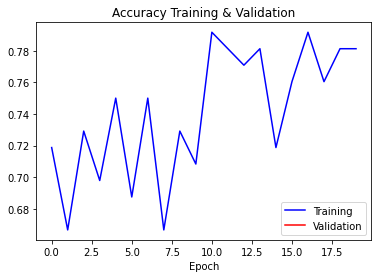

In [ ]:
plt.plot(history.history['accuracy'], label='Training', color='blue')
plt.plot(history.history['val_accuracy'], label='Validation', color='red')
plt.title('Accuracy Training & Validation')
plt.xlabel('Epoch')
plt.legend(loc="lower right")
plt.show()

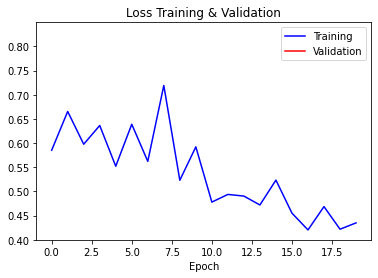

In [ ]:
plt.plot(history.history['loss'], label='Training', color='blue')
plt.plot(history.history['val_loss'], label='Validation', color='red')
plt.title('Loss Training & Validation')
plt.xlabel('Epoch')
plt.legend(loc="upper right")
plt.show()

Saving DSC_0106.jpg to DSC_0106.jpg


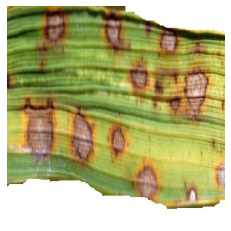

DSC_0106.jpg
GAMBAR INI ADALAH BROWN SPOT


In [ ]:
# melakukan prediksi
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path =   fn
  img = image.load_img(path, target_size=(300, 300))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  classes = np.argmax(classes)
  plt.axis('Off')
  plt.imshow(img)
  plt.show()
  
  print(fn)
  if classes== 0:
    print('GAMBAR INI ADALAH BACTERIAL LEAF ')
  elif classes==1:
    print('GAMBAR INI ADALAH BROWN SPOT')
  else:
    print(' GAMBAR INI ADALAH LEAF SMUT')